<a href="https://colab.research.google.com/github/Sajanm2058/Brain-Tumor-Detection-Using-Yolov8n-model-from-ultralytics-/blob/main/Polyp_Detection_Yolov8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install ultralytics --upgrade --quiet
from ultralytics import YOLO
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

In [3]:
import os
import shutil
import random

# Paths - Update these if needed
base_dataset_dir = '/content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG'
images_dir = os.path.join(base_dataset_dir, 'images')
labels_dir = os.path.join(base_dataset_dir, 'labels')

# Destination YOLO directory
yolo_base_dir = '/content/Kvasir-YOLO'

# Create YOLO directory structure
splits = ['train', 'val', 'test']
for split in splits:
    os.makedirs(os.path.join(yolo_base_dir, 'images', split), exist_ok=True)
    os.makedirs(os.path.join(yolo_base_dir, 'labels', split), exist_ok=True)

# Get all image files (assuming .jpg)
all_images = [f for f in os.listdir(images_dir) if f.lower().endswith('.jpg')]
random.shuffle(all_images)

# Split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

total = len(all_images)
train_end = int(total * train_ratio)
val_end = train_end + int(total * val_ratio)

train_files = all_images[:train_end]
val_files = all_images[train_end:val_end]
test_files = all_images[val_end:]

def copy_files(file_list, split_name):
    for fname in file_list:
        # Copy image
        src_img = os.path.join(images_dir, fname)
        dst_img = os.path.join(yolo_base_dir, 'images', split_name, fname)
        shutil.copy(src_img, dst_img)

        # Copy corresponding label file (.txt)
        label_fname = fname.replace('.jpg', '.txt')
        src_label = os.path.join(labels_dir, label_fname)
        dst_label = os.path.join(yolo_base_dir, 'labels', split_name, label_fname)
        if os.path.exists(src_label):
            shutil.copy(src_label, dst_label)
        else:
            print(f"Warning: Label file missing for {fname}")

# Copy files to each split folder
copy_files(train_files, 'train')
copy_files(val_files, 'val')
copy_files(test_files, 'test')

print("✅ Dataset split and folder structure ready!")
print(f"Train: {len(train_files)} images")
print(f"Val: {len(val_files)} images")
print(f"Test: {len(test_files)} images")


✅ Dataset split and folder structure ready!
Train: 700 images
Val: 200 images
Test: 100 images


In [4]:
yaml_content = """
path: /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO
train: images/train
val: images/val
test: images/test

nc: 1
names: ['polyp']
"""

with open("kvasir.yaml", "w") as f:
    f.write(yaml_content)


In [6]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt if you prefer
model.train(data="kvasir.yaml", epochs=50, imgsz=640, batch=16)

100%|██████████| 6.25M/6.25M [00:00<00:00, 118MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=kvasir.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 9.0±3.6 MB/s, size: 36.0 KB)


train: Scanning /content/drive/.shortcut-targets-by-id/1s7EWjLo8KWavMhuYtyeEJcg3WK4rDzjX/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/labels/train... 700 images, 0 backgrounds, 0 corrupt: 100%|██████████| 700/700 [00:07<00:00, 98.17it/s] 


train: New cache created: /content/drive/.shortcut-targets-by-id/1s7EWjLo8KWavMhuYtyeEJcg3WK4rDzjX/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.9±1.1 ms, read: 4.3±3.2 MB/s, size: 63.2 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1s7EWjLo8KWavMhuYtyeEJcg3WK4rDzjX/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/labels/val... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:03<00:00, 59.06it/s] 


val: New cache created: /content/drive/.shortcut-targets-by-id/1s7EWjLo8KWavMhuYtyeEJcg3WK4rDzjX/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.02G      1.024      2.243      1.366         28        640: 100%|██████████| 44/44 [00:17<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        212      0.872       0.16      0.483      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.77G       1.14      1.906      1.444         31        640: 100%|██████████| 44/44 [00:14<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


                   all        200        212      0.651      0.538      0.597      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.79G      1.186      1.771      1.453         27        640: 100%|██████████| 44/44 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        200        212      0.514      0.528      0.509      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.8G      1.191      1.683      1.468         35        640: 100%|██████████| 44/44 [00:14<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]


                   all        200        212      0.541      0.505      0.488      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.82G      1.222      1.607       1.52         26        640: 100%|██████████| 44/44 [00:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        200        212      0.543      0.538      0.538      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.84G        1.2      1.537      1.472         29        640: 100%|██████████| 44/44 [00:14<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        200        212       0.67      0.514      0.571      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.86G      1.182      1.486      1.461         19        640: 100%|██████████| 44/44 [00:15<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        200        212      0.782      0.692      0.772       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.88G      1.122       1.38      1.422         29        640: 100%|██████████| 44/44 [00:18<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]

                   all        200        212      0.719      0.547      0.658      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.89G      1.088      1.341       1.39         26        640: 100%|██████████| 44/44 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        200        212      0.715      0.627      0.692      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.91G      1.067       1.24       1.38         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        200        212      0.779      0.656      0.777      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.93G      1.072      1.251      1.401         24        640: 100%|██████████| 44/44 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        200        212      0.733      0.698      0.769      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.94G      1.034      1.232      1.381         29        640: 100%|██████████| 44/44 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        212      0.745      0.731      0.783      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.96G       1.01      1.127      1.346         25        640: 100%|██████████| 44/44 [00:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        200        212      0.739      0.748      0.794      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.98G      1.004      1.153      1.336         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        200        212      0.763      0.722      0.788      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.99G      1.008      1.092      1.319         19        640: 100%|██████████| 44/44 [00:14<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        200        212      0.851      0.741      0.819       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.01G      1.005       1.12      1.343         29        640: 100%|██████████| 44/44 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        200        212      0.669      0.675      0.714       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.03G     0.9811      1.068      1.324         31        640: 100%|██████████| 44/44 [00:14<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        200        212      0.815      0.807      0.864      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.04G     0.9445      1.012      1.304         27        640: 100%|██████████| 44/44 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        200        212      0.792      0.752      0.833      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.06G     0.9706      1.038      1.315         33        640: 100%|██████████| 44/44 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        200        212      0.825      0.802      0.877      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.08G     0.9958      1.073       1.33         34        640: 100%|██████████| 44/44 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]

                   all        200        212      0.779      0.731      0.796      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.1G     0.9317      1.035      1.292         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        200        212      0.829      0.731       0.85      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.11G     0.9127     0.9957       1.28         20        640: 100%|██████████| 44/44 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.92it/s]

                   all        200        212      0.799      0.769      0.836        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.13G     0.9031     0.9396      1.262         32        640: 100%|██████████| 44/44 [00:14<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        200        212      0.844      0.797       0.87      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.15G     0.9406     0.9852      1.294         22        640: 100%|██████████| 44/44 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        200        212      0.809      0.764      0.846      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.16G     0.8844     0.9305      1.254         25        640: 100%|██████████| 44/44 [00:14<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        200        212      0.861      0.778      0.882      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.18G     0.8615     0.8696      1.251         28        640: 100%|██████████| 44/44 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        200        212      0.848      0.797       0.88      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.2G     0.8213     0.8645      1.224         28        640: 100%|██████████| 44/44 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        200        212      0.795      0.821      0.877      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.21G     0.8596     0.9036       1.24         26        640: 100%|██████████| 44/44 [00:14<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        200        212      0.871      0.783       0.88      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.23G     0.8409     0.8463      1.226         25        640: 100%|██████████| 44/44 [00:15<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        200        212      0.832      0.818      0.886      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.25G     0.8425     0.8347      1.226         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        200        212      0.854      0.825        0.9      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.27G     0.8165     0.8412      1.212         29        640: 100%|██████████| 44/44 [00:14<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        200        212      0.856      0.783      0.896      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.28G     0.8138      0.838      1.213         28        640: 100%|██████████| 44/44 [00:14<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        200        212      0.869      0.814      0.897      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.3G     0.8209     0.8305      1.224         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]

                   all        200        212      0.884      0.828      0.903      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.32G      0.802     0.7801      1.174         18        640: 100%|██████████| 44/44 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


                   all        200        212       0.84      0.792      0.859      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.33G     0.8163     0.7982      1.215         30        640: 100%|██████████| 44/44 [00:14<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.23it/s]

                   all        200        212      0.826      0.849       0.89      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.35G     0.7996     0.7683      1.209         20        640: 100%|██████████| 44/44 [00:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        200        212      0.913      0.825      0.909      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.37G     0.7539     0.7503      1.176         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        200        212      0.889       0.84      0.913       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.39G     0.7303     0.7363      1.166         25        640: 100%|██████████| 44/44 [00:14<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        200        212       0.87      0.853      0.903      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.4G     0.7486     0.7192      1.162         32        640: 100%|██████████| 44/44 [00:14<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        200        212      0.908      0.811      0.909      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.42G     0.7594     0.7202      1.194         23        640: 100%|██████████| 44/44 [00:14<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        200        212      0.897      0.844      0.917      0.715


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.44G     0.6192     0.6027      1.074         14        640: 100%|██████████| 44/44 [00:15<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

                   all        200        212      0.861      0.892      0.917      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.46G     0.6282     0.5811      1.095         12        640: 100%|██████████| 44/44 [00:13<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        200        212      0.863      0.873      0.907      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.47G     0.6121     0.5662      1.088         12        640: 100%|██████████| 44/44 [00:13<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        200        212      0.863      0.835      0.904      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.49G     0.5773     0.5096      1.052         12        640: 100%|██████████| 44/44 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        200        212      0.842      0.863        0.9      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.51G     0.5698     0.4847      1.041         15        640: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        200        212       0.86      0.863       0.91      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.52G     0.5531     0.4836      1.038         14        640: 100%|██████████| 44/44 [00:13<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        200        212      0.923      0.825      0.923      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.54G     0.5493     0.4716      1.024         12        640: 100%|██████████| 44/44 [00:13<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200        212      0.889      0.858      0.917      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.56G     0.5415     0.4724      1.022         12        640: 100%|██████████| 44/44 [00:12<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        200        212      0.896      0.858      0.917       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.58G     0.5268     0.4363      1.013         13        640: 100%|██████████| 44/44 [00:13<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        200        212      0.913      0.854      0.918      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.59G     0.5052      0.427      1.001         12        640: 100%|██████████| 44/44 [00:13<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.35it/s]

                   all        200        212      0.887      0.873      0.918      0.732



50 epochs completed in 0.247 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


                   all        200        212      0.923      0.825      0.923      0.735
Speed: 0.3ms preprocess, 4.1ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eed037d0f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [7]:
results = model.predict(source="/content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test", save=True, conf=0.25)


image 1/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju0qx73cjw570799j4n5cjze.jpg: 576x640 1 polyp, 35.1ms
image 2/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju0u82z3cuma0835wlxrnrjv.jpg: 576x640 2 polyps, 15.9ms
image 3/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju13cgqmnhwn0988yrainhcp.jpg: 576x640 1 polyp, 7.4ms
image 4/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju15l5ubz9yh0855b3ivdpse.jpg: 576x640 1 polyp, 11.2ms
image 5/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju15mhjczc8z0801kit5c6di.jpg: 576x640 1 polyp, 7.1ms
image 6/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju160wshltz10993i1gmqxbe.jpg: 576x640 1 polyp, 7.1ms
image 7/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju16jgnyzp970878melv7r25.jpg: 608x640 1 polyp, 36.4ms
image 8

In [8]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 5.6±10.1 ms, read: 14.2±8.0 MB/s, size: 31.7 KB)


val: Scanning /content/drive/.shortcut-targets-by-id/1s7EWjLo8KWavMhuYtyeEJcg3WK4rDzjX/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.67it/s]


                   all        200        212      0.911      0.854      0.926      0.736
Speed: 0.9ms preprocess, 8.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7eed02c98ad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [9]:
import shutil

# Source path (YOLO saves best model here)
src = '/content/runs/detect/train/weights/best.pt'

# Destination (your Drive)
dst = '/content/drive/MyDrive/Kvasir-SEG-best.pt'

shutil.copy(src, dst)
print("✅ Model saved to your Drive:", dst)


✅ Model saved to your Drive: /content/drive/MyDrive/Kvasir-SEG-best.pt


In [10]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # or path from your Drive

# Run prediction on test images
results = model.predict(
    source='/content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test',
    conf=0.25,
    save=True,
    save_txt=True
)



image 1/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju0qx73cjw570799j4n5cjze.jpg: 576x640 1 polyp, 7.8ms
image 2/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju0u82z3cuma0835wlxrnrjv.jpg: 576x640 2 polyps, 7.0ms
image 3/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju13cgqmnhwn0988yrainhcp.jpg: 576x640 1 polyp, 7.1ms
image 4/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju15l5ubz9yh0855b3ivdpse.jpg: 576x640 1 polyp, 7.0ms
image 5/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju15mhjczc8z0801kit5c6di.jpg: 576x640 1 polyp, 7.0ms
image 6/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju160wshltz10993i1gmqxbe.jpg: 576x640 1 polyp, 7.1ms
image 7/100 /content/drive/MyDrive/segPolyp_Dataset/Kvasir-SEG/Kvasir-YOLO/images/test/cju16jgnyzp970878melv7r25.jpg: 608x640 1 polyp, 7.8ms
image 8/100

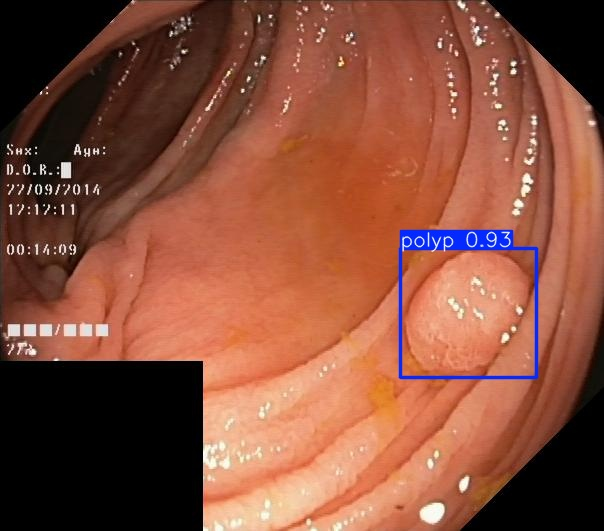

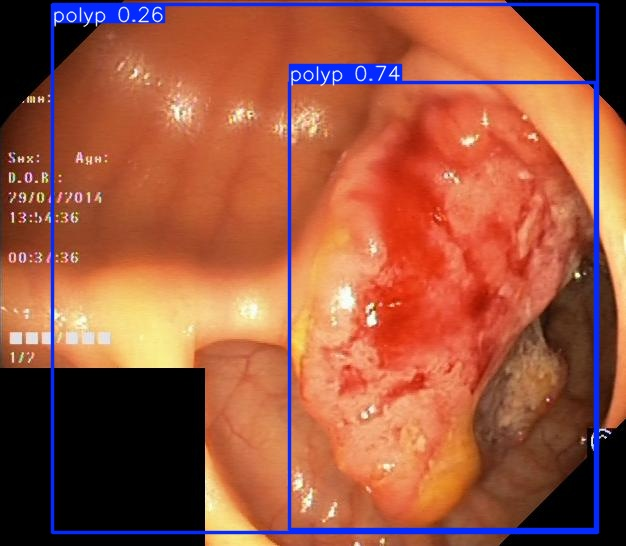

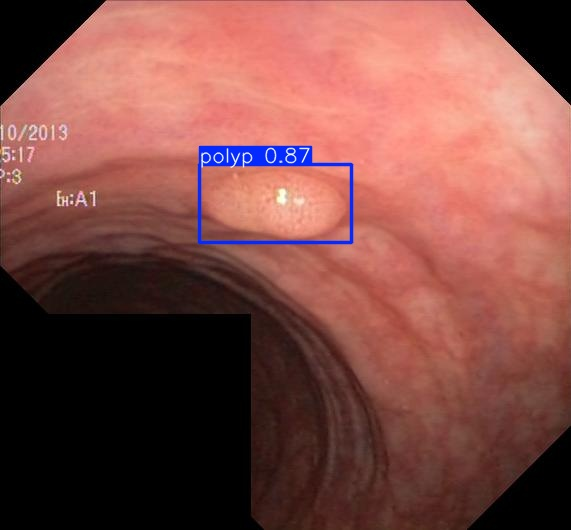

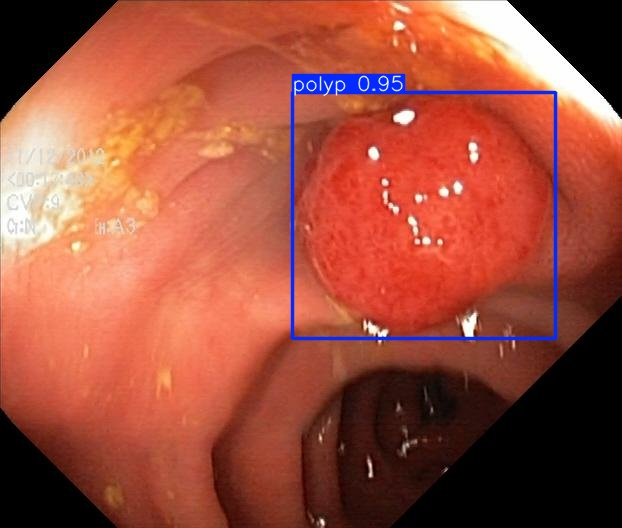

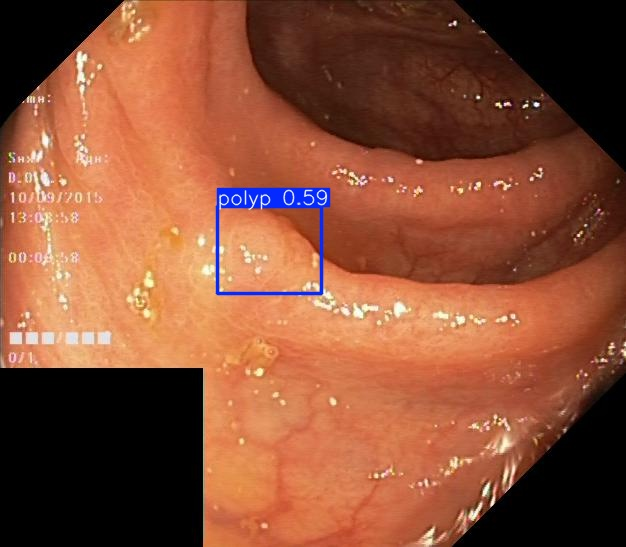

In [11]:
import glob
from IPython.display import Image, display

# Get predicted images
predicted_imgs = glob.glob('/content/runs/detect/predict/*.jpg')

# Show a few
for img_path in predicted_imgs[:5]:
    display(Image(filename=img_path))
